In [ ]:
!pip install --upgrade lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 19.3 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.1.0
    Uninstalling lightgbm-4.1.0:
      Successfully uninstalled lightgbm-4.1.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/캡스톤 디자인/seasons/final.csv")

In [ ]:
df

,HomeTeam_Arsenal,HomeTeam_Chelsea,HomeTeam_Liverpool,HomeTeam_Man City,HomeTeam_Man United,HomeTeam_Tottenham,AwayTeam_Arsenal,AwayTeam_Chelsea,AwayTeam_Liverpool,AwayTeam_Man City,...,FTTG,POSOAT,POSOHT,POSOT,Arsenal_Points,Chelsea_Points,Liverpool_Points,Man City_Points,Man United_Points,Tottenham_Points
0,1,0,0,0.0,0,0,0,0,1,0.0,...,2,0.166667,0.500000,0.666667,3,0,0,0,0,0
1,0,1,0,0.0,0,0,1,0,0,0.0,...,4,0.200000,0.200000,0.400000,4,1,0,0,0,0
2,0,0,1,0.0,0,0,0,0,0,1.0,...,5,0.304348,0.347826,0.652174,4,1,3,0,0,0
3,0,0,0,0.0,1,0,0,1,0,0.0,...,6,0.208333,0.208333,0.416667,4,2,3,0,1,0
4,0,0,0,0.0,0,1,0,0,0,1.0,...,0,0.080000,0.200000,0.280000,4,2,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,1,0,0,0.0,0,0,0,0,1,0.0,...,3,0.368421,0.105263,0.473684,10,9,17,17,8,10
612,0,0,0,0.0,0,1,0,0,0,0.0,...,4,0.291667,0.125000,0.416667,10,9,17,17,11,10
613,0,0,0,1.0,0,0,0,1,0,0.0,...,3,0.178571,0.142857,0.321429,10,12,17,17,11,10
614,0,1,0,0.0,0,0,1,0,0,0.0,...,1,0.083333,0.208333,0.291667,13,12,17,17,11,10


In [ ]:
df.shape

(616, 46)

In [ ]:
df.dtypes

HomeTeam_Arsenal         int64
HomeTeam_Chelsea         int64
HomeTeam_Liverpool       int64
HomeTeam_Man City      float64
HomeTeam_Man United      int64
HomeTeam_Tottenham       int64
AwayTeam_Arsenal         int64
AwayTeam_Chelsea         int64
AwayTeam_Liverpool       int64
AwayTeam_Man City      float64
AwayTeam_Man United      int64
AwayTeam_Tottenham       int64
DateTime                object
HomeTeam                object
AwayTeam                object
FTHG                     int64
FTAG                     int64
FTR                    float64
HTHG                   float64
HTAG                   float64
HTR                    float64
Referee                 object
HS                     float64
AS                     float64
HST                    float64
AST                    float64
HC                     float64
AC                     float64
HF                     float64
AF                     float64
HY                     float64
AY                     float64
HR      

In [ ]:
df[['AST', 'HC', 'AC', 'HF',
       'AF', 'HY', 'AY', 'HR', 'AR', 'TY', 'Ref_Card_Style', 'FTTG', 'POSOAT',
       'POSOHT', 'POSOT', 'Arsenal_Points', 'Chelsea_Points',
       'Liverpool_Points', 'Man City_Points', 'Man United_Points']].dtypes

AST                  float64
HC                   float64
AC                   float64
HF                   float64
AF                   float64
HY                   float64
AY                   float64
HR                   float64
AR                   float64
TY                   float64
Ref_Card_Style         int64
FTTG                   int64
POSOAT               float64
POSOHT               float64
POSOT                float64
Arsenal_Points         int64
Chelsea_Points         int64
Liverpool_Points       int64
Man City_Points        int64
Man United_Points      int64
dtype: object

In [ ]:
df=df.drop(['Referee'],axis=1)

In [ ]:
# DateTime 열이 실제로 존재하는지 확인
if 'DateTime' in df.columns:
    # DateTime 열을 datetime 형식으로 변환
    df['DateTime'] = pd.to_datetime(df['DateTime'])

    # 연, 월, 일 등의 구성 요소 추출
    df['Year'] = df['DateTime'].dt.year
    df['Month'] = df['DateTime'].dt.month
    df['Day'] = df['DateTime'].dt.day
    df['Hour'] = df['DateTime'].dt.hour
    df['Minute'] = df['DateTime'].dt.minute

    # Unix 시간으로 변환
    df['UnixTime'] = df['DateTime'].astype(int) / 10**9

    # DateTime 열 삭제
    df.drop(['DateTime'], axis=1, inplace=True)
else:
    print("DateTime 열이 존재하지 않습니다.")


In [ ]:
df

,HomeTeam_Arsenal,HomeTeam_Chelsea,HomeTeam_Liverpool,HomeTeam_Man City,HomeTeam_Man United,HomeTeam_Tottenham,AwayTeam_Arsenal,AwayTeam_Chelsea,AwayTeam_Liverpool,AwayTeam_Man City,...,Liverpool_Points,Man City_Points,Man United_Points,Tottenham_Points,Year,Month,Day,Hour,Minute,UnixTime
0,1,0,0,0.0,0,0,0,0,1,0.0,...,0,0,0,0,2000,8,21,1,0,9.668196e+08
1,0,1,0,0.0,0,0,1,0,0,0.0,...,0,0,0,0,2000,9,6,1,0,9.682020e+08
2,0,0,1,0.0,0,0,0,0,0,1.0,...,3,0,0,0,2000,9,9,1,0,9.684612e+08
3,0,0,0,0.0,1,0,0,1,0,0.0,...,3,0,1,0,2000,9,23,1,0,9.696708e+08
4,0,0,0,0.0,0,1,0,0,0,1.0,...,3,1,1,1,2000,9,23,1,0,9.696708e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,1,0,0,0.0,0,0,0,0,1,0.0,...,17,17,8,10,2021,4,3,21,0,1.617484e+09
612,0,0,0,0.0,0,1,0,0,0,0.0,...,17,17,11,10,2021,4,11,17,30,1.618162e+09
613,0,0,0,1.0,0,0,0,1,0,0.0,...,17,17,11,10,2021,5,8,18,30,1.620499e+09
614,0,1,0,0.0,0,0,1,0,0,0.0,...,17,17,11,10,2021,5,12,21,15,1.620854e+09


In [ ]:
df.dtypes

HomeTeam_Arsenal         int64
HomeTeam_Chelsea         int64
HomeTeam_Liverpool       int64
HomeTeam_Man City      float64
HomeTeam_Man United      int64
HomeTeam_Tottenham       int64
AwayTeam_Arsenal         int64
AwayTeam_Chelsea         int64
AwayTeam_Liverpool       int64
AwayTeam_Man City      float64
AwayTeam_Man United      int64
AwayTeam_Tottenham       int64
HomeTeam                object
AwayTeam                object
FTHG                     int64
FTAG                     int64
FTR                    float64
HTHG                   float64
HTAG                   float64
HTR                    float64
HS                     float64
AS                     float64
HST                    float64
AST                    float64
HC                     float64
AC                     float64
HF                     float64
AF                     float64
HY                     float64
AY                     float64
HR                     float64
AR                     float64
TY      

In [ ]:
df.columns

Index(['HomeTeam_Arsenal', 'HomeTeam_Chelsea', 'HomeTeam_Liverpool',
       'HomeTeam_Man City', 'HomeTeam_Man United', 'HomeTeam_Tottenham',
       'AwayTeam_Arsenal', 'AwayTeam_Chelsea', 'AwayTeam_Liverpool',
       'AwayTeam_Man City', 'AwayTeam_Man United', 'AwayTeam_Tottenham',
       'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR',
       'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR',
       'AR', 'TY', 'Ref_Card_Style', 'FTTG', 'POSOAT', 'POSOHT', 'POSOT',
       'Arsenal_Points', 'Chelsea_Points', 'Liverpool_Points',
       'Man City_Points', 'Man United_Points', 'Tottenham_Points', 'Year',
       'Month', 'Day', 'Hour', 'Minute', 'UnixTime'],
      dtype='object')

In [ ]:
df

,HomeTeam_Arsenal,HomeTeam_Chelsea,HomeTeam_Liverpool,HomeTeam_Man City,HomeTeam_Man United,HomeTeam_Tottenham,AwayTeam_Arsenal,AwayTeam_Chelsea,AwayTeam_Liverpool,AwayTeam_Man City,...,Liverpool_Points,Man City_Points,Man United_Points,Tottenham_Points,Year,Month,Day,Hour,Minute,UnixTime
0,1,0,0,0.0,0,0,0,0,1,0.0,...,0,0,0,0,2000,8,21,1,0,9.668196e+08
1,0,1,0,0.0,0,0,1,0,0,0.0,...,0,0,0,0,2000,9,6,1,0,9.682020e+08
2,0,0,1,0.0,0,0,0,0,0,1.0,...,3,0,0,0,2000,9,9,1,0,9.684612e+08
3,0,0,0,0.0,1,0,0,1,0,0.0,...,3,0,1,0,2000,9,23,1,0,9.696708e+08
4,0,0,0,0.0,0,1,0,0,0,1.0,...,3,1,1,1,2000,9,23,1,0,9.696708e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,1,0,0,0.0,0,0,0,0,1,0.0,...,17,17,8,10,2021,4,3,21,0,1.617484e+09
612,0,0,0,0.0,0,1,0,0,0,0.0,...,17,17,11,10,2021,4,11,17,30,1.618162e+09
613,0,0,0,1.0,0,0,0,1,0,0.0,...,17,17,11,10,2021,5,8,18,30,1.620499e+09
614,0,1,0,0.0,0,0,1,0,0,0.0,...,17,17,11,10,2021,5,12,21,15,1.620854e+09


In [ ]:
df.dtypes

HomeTeam_Arsenal         int64
HomeTeam_Chelsea         int64
HomeTeam_Liverpool       int64
HomeTeam_Man City      float64
HomeTeam_Man United      int64
HomeTeam_Tottenham       int64
AwayTeam_Arsenal         int64
AwayTeam_Chelsea         int64
AwayTeam_Liverpool       int64
AwayTeam_Man City      float64
AwayTeam_Man United      int64
AwayTeam_Tottenham       int64
HomeTeam                object
AwayTeam                object
FTHG                     int64
FTAG                     int64
FTR                    float64
HTHG                   float64
HTAG                   float64
HTR                    float64
HS                     float64
AS                     float64
HST                    float64
AST                    float64
HC                     float64
AC                     float64
HF                     float64
AF                     float64
HY                     float64
AY                     float64
HR                     float64
AR                     float64
TY      

In [ ]:
print(df.describe)

<bound method NDFrame.describe of      HomeTeam_Arsenal  HomeTeam_Chelsea  HomeTeam_Liverpool  \
0                   1                 0                   0   
1                   0                 1                   0   
2                   0                 0                   1   
3                   0                 0                   0   
4                   0                 0                   0   
..                ...               ...                 ...   
611                 1                 0                   0   
612                 0                 0                   0   
613                 0                 0                   0   
614                 0                 1                   0   
615                 0                 0                   0   

     HomeTeam_Man City  HomeTeam_Man United  HomeTeam_Tottenham  \
0                  0.0                    0                   0   
1                  0.0                    0                   0   
2       

In [ ]:
df=df.drop(['HomeTeam','AwayTeam'],axis=1)

In [ ]:
df=df.drop(['AC', 'AY', 'FTTG', 'TY', 'HS', 'AS', 'HR', 'HC', 'HF', 'HY', 'AR'],axis=1)

In [ ]:
# df=df.drop(['Year','Month','Day','Hour','Minute'],axis=1)

In [ ]:
df.columns

Index(['HomeTeam_Arsenal', 'HomeTeam_Chelsea', 'HomeTeam_Liverpool',
       'HomeTeam_Man City', 'HomeTeam_Man United', 'HomeTeam_Tottenham',
       'AwayTeam_Arsenal', 'AwayTeam_Chelsea', 'AwayTeam_Liverpool',
       'AwayTeam_Man City', 'AwayTeam_Man United', 'AwayTeam_Tottenham',
       'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'HST', 'AST', 'AF',
       'Ref_Card_Style', 'POSOAT', 'POSOHT', 'POSOT', 'Arsenal_Points',
       'Chelsea_Points', 'Liverpool_Points', 'Man City_Points',
       'Man United_Points', 'Tottenham_Points', 'Year', 'Month', 'Day', 'Hour',
       'Minute', 'UnixTime'],
      dtype='object')

In [ ]:
cor = df.drop(['HomeTeam_Arsenal', 'HomeTeam_Chelsea', 'HomeTeam_Liverpool',
       'HomeTeam_Man City', 'HomeTeam_Man United', 'HomeTeam_Tottenham',
       'AwayTeam_Arsenal', 'AwayTeam_Chelsea', 'AwayTeam_Liverpool',
       'AwayTeam_Man City', 'AwayTeam_Man United', 'AwayTeam_Tottenham',
       'UnixTime'],axis = 1)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


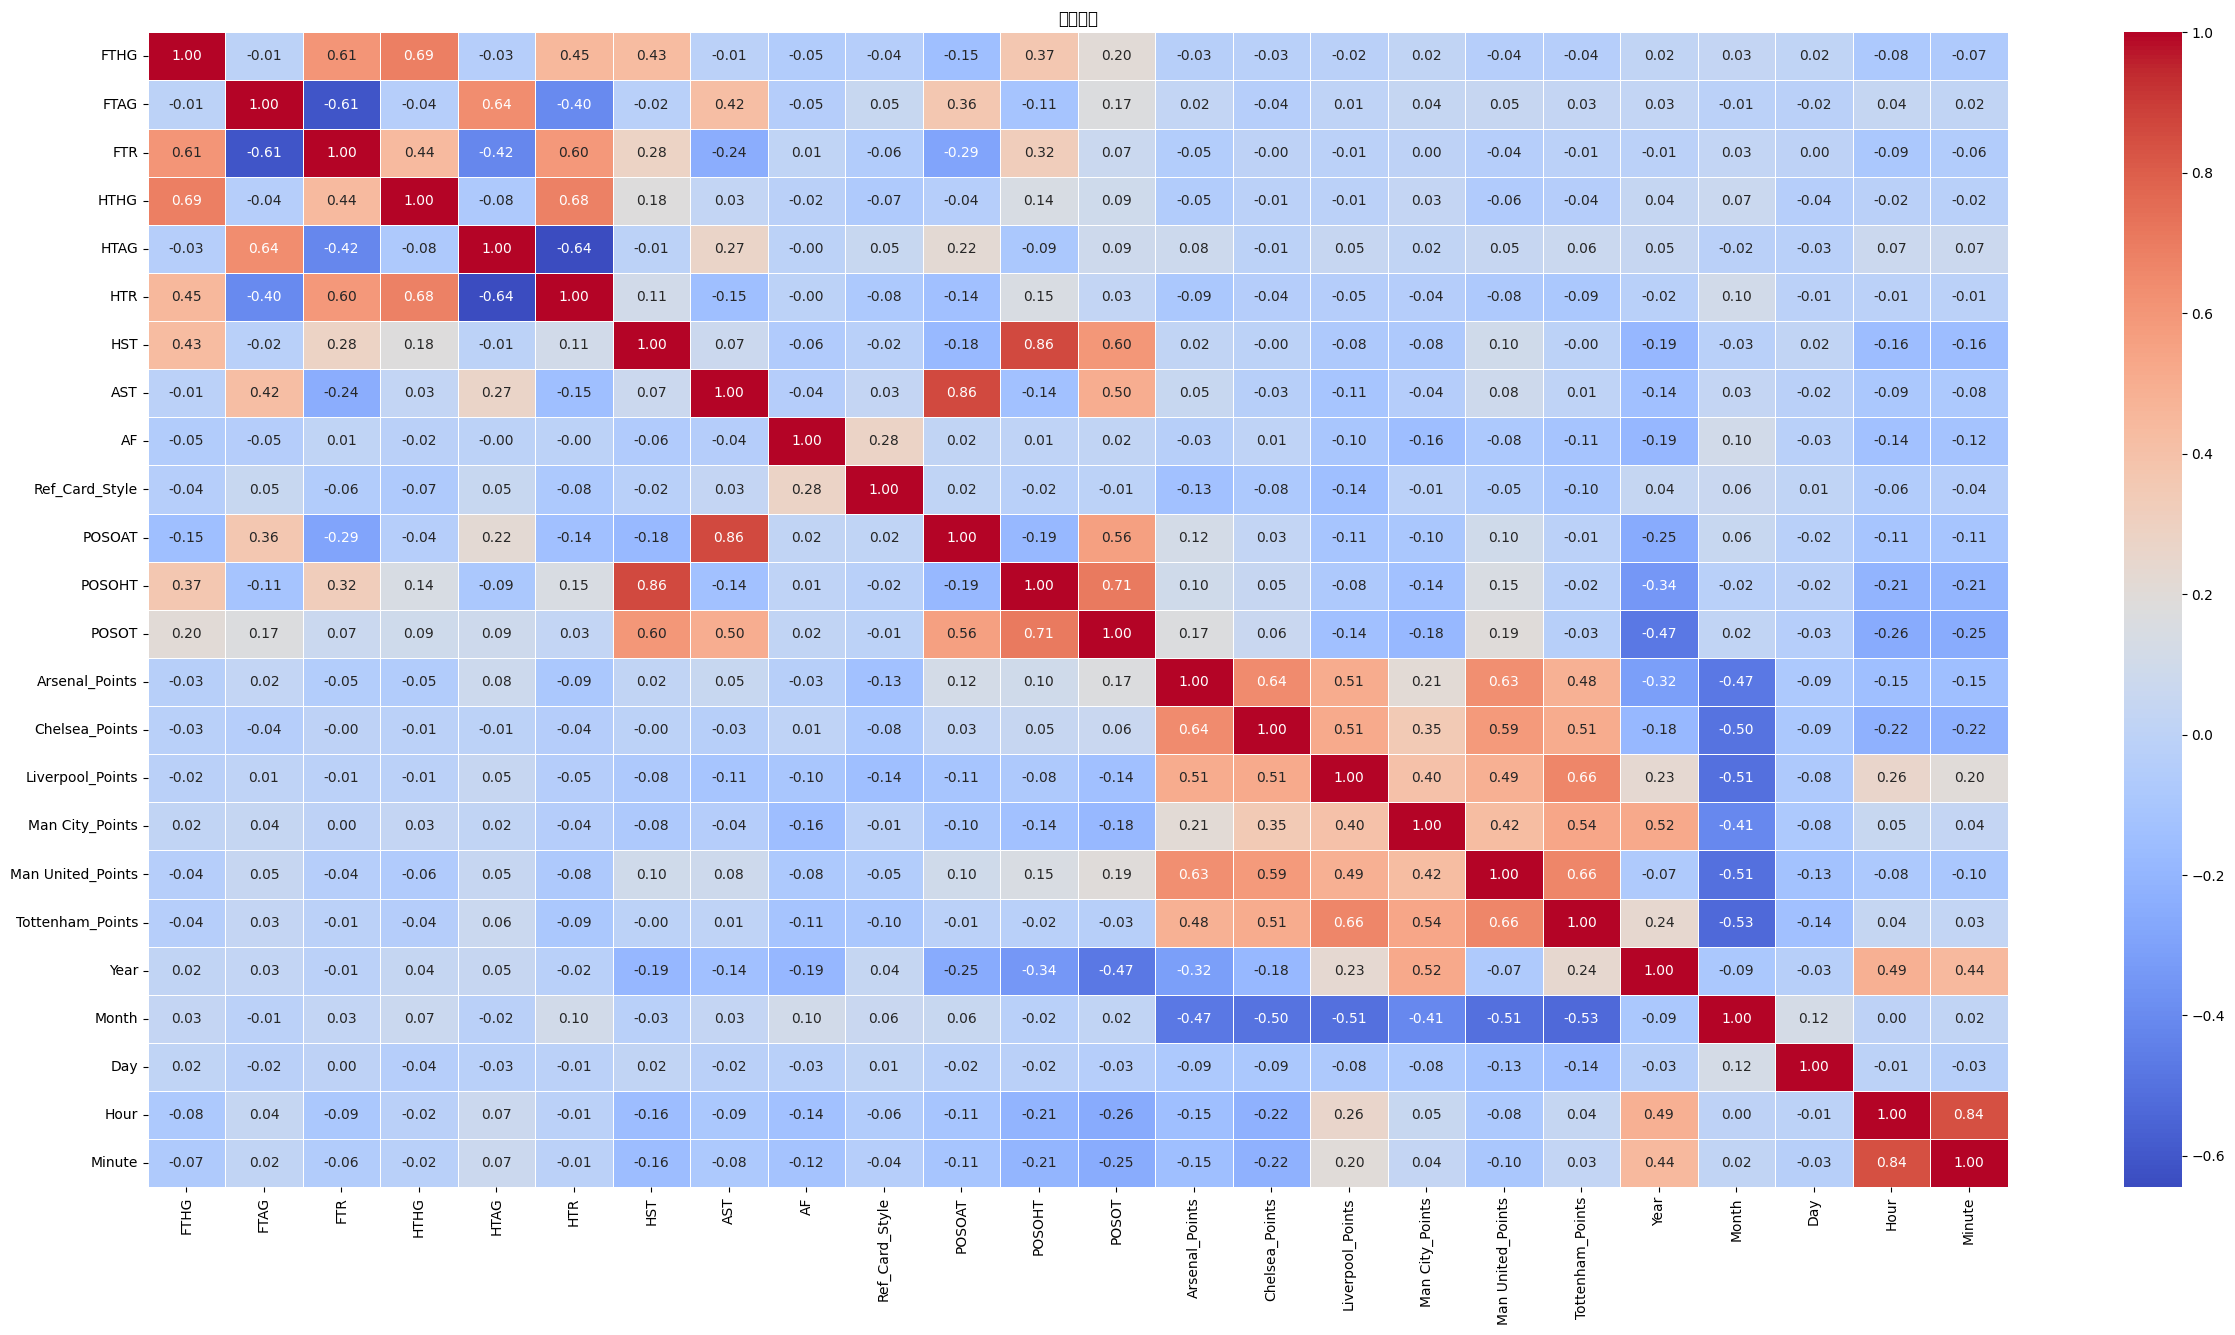

In [ ]:
corrs = cor.corr()
plt.figure(figsize=(30, 15))
sns.heatmap(corrs, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('상관관계')
plt.show()

In [ ]:
X = df.drop(['Arsenal_Points', 'Chelsea_Points', 'Liverpool_Points',
             'Man City_Points', 'Man United_Points', 'Tottenham_Points'], axis=1)  # 독립변수
y = df[['Arsenal_Points', 'Chelsea_Points', 'Liverpool_Points',
        'Man City_Points', 'Man United_Points', 'Tottenham_Points']]  # 종속변수

In [ ]:
X.columns

Index(['HomeTeam_Arsenal', 'HomeTeam_Chelsea', 'HomeTeam_Liverpool',
       'HomeTeam_Man City', 'HomeTeam_Man United', 'HomeTeam_Tottenham',
       'AwayTeam_Arsenal', 'AwayTeam_Chelsea', 'AwayTeam_Liverpool',
       'AwayTeam_Man City', 'AwayTeam_Man United', 'AwayTeam_Tottenham',
       'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'HST', 'AST', 'AF',
       'Ref_Card_Style', 'POSOAT', 'POSOHT', 'POSOT', 'Year', 'Month', 'Day',
       'Hour', 'Minute', 'UnixTime'],
      dtype='object')

In [ ]:
y.columns

Index(['Arsenal_Points', 'Chelsea_Points', 'Liverpool_Points',
       'Man City_Points', 'Man United_Points', 'Tottenham_Points'],
      dtype='object')

RandomForest

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)

# y_pred = rf_model.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test,y_pred)
# print("MSE", mse)
# print("MAE", mae)

MSE 4.521433783783784
MAE 1.6163693693693695


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df.drop(['Arsenal_Points', 'Chelsea_Points', 'Liverpool_Points', 'Man City_Points', 'Man United_Points','Tottenham_Points'], axis=1)

targets = ['Arsenal_Points', 'Chelsea_Points', 'Liverpool_Points', 'Man City_Points', 'Man United_Points','Tottenham_Points']

mae_list = []
mse_list = []
r_squared_list = []

for target in targets:
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mae_list.append(mae)

    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

    r_squared = r2_score(y_test, y_pred)
    r_squared_list.append(r_squared)

    print(f'Metrics for {target}:')
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'R-squared: {r_squared}')
    print('')

average_mae = sum(mae_list) / len(mae_list)
average_mse = sum(mse_list) / len(mse_list)
average_r_squared = sum(r_squared_list) / len(r_squared_list)

print('Overall Metrics:')
print(f'Average MAE: {average_mae}')
print(f'Average MSE: {average_mse}')
print(f'Average R-squared: {average_r_squared}')


Metrics for Arsenal_Points:
MAE: 1.5670161290322582
MSE: 3.8057072580645155
R-squared: 0.8715491513666815

Metrics for Chelsea_Points:
MAE: 2.1865322580645166
MSE: 8.318626612903225
R-squared: 0.7367877509275704

Metrics for Liverpool_Points:
MAE: 1.9654838709677418
MSE: 6.417266129032259
R-squared: 0.7858399571123782

Metrics for Man City_Points:
MAE: 1.3178225806451611
MSE: 3.2622104838709687
R-squared: 0.8960279656326758

Metrics for Man United_Points:
MAE: 2.3746774193548386
MSE: 9.701262903225807
R-squared: 0.7399262173636356

Metrics for Tottenham_Points:
MAE: 1.3296774193548389
MSE: 2.7794629032258062
R-squared: 0.8106258043646838

Overall Metrics:
Average MAE: 1.7902016129032257
Average MSE: 5.714089381720431
Average R-squared: 0.8067928077946043


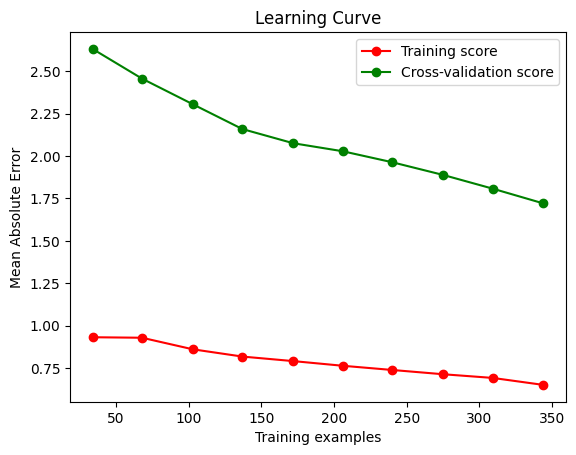

In [ ]:
#sklearn의 learning_curve를 활용하여 train과정에서 mae의 변화를 시각화함
train_sizes, train_scores, test_scores = learning_curve(
    RandomForestRegressor(random_state=42),
    X_train,
    y_train,
    n_jobs=-1,
    train_sizes=np.linspace(.1, 1.0, 10),
    scoring='neg_mean_absolute_error'
)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Mean Absolute Error")
plt.legend(loc="best")
plt.show()

In [ ]:
# from sklearn.datasets import make_multilabel_classification
# from sklearn.multioutput import MultiOutputClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report

# # 다중 출력 분류용 가상 데이터 생성
# X, y = make_multilabel_classification(n_samples=100, n_features=10, n_classes=3, random_state=42)

# # 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # RandomForestClassifier 모델 생성
# model = RandomForestClassifier(random_state=42)

# # 다중 출력 분류 모델 생성
# multi_output_model = MultiOutputClassifier(model)

# # 모델 훈련
# multi_output_model.fit(X_train, y_train)

# # 테스트 데이터로 예측
# y_pred = multi_output_model.predict(X_test)

# # 평가: 각각의 출력에 대해 정확도와 분류 보고서를 출력하여 모델의 성능을 평가
# for i in range(y.shape[1]):
#     acc = accuracy_score(y_test[:, i], y_pred[:, i])
#     report = classification_report(y_test[:, i], y_pred[:, i])
#     print(f"Target {i+1} Accuracy: {acc:.2f}")
#     print(f"Target {i+1} Classification Report:\n{report}")

Target 1 Accuracy: 0.80
Target 1 Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.89      0.73      0.80        11

    accuracy                           0.80        20
   macro avg       0.81      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20

Target 2 Accuracy: 0.80
Target 2 Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.85      0.85      0.85        13

    accuracy                           0.80        20
   macro avg       0.78      0.78      0.78        20
weighted avg       0.80      0.80      0.80        20

Target 3 Accuracy: 0.80
Target 3 Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.83      0.83      0.83        12

    accuracy  

xgb회귀

In [ ]:
# # XGBRegressor 모델 생성
# model = xgb.XGBRegressor()

# # 모델 훈련
# model.fit(X_train, y_train)

# # 예측
# y_pred = model.predict(X_test)

# # 평가: 예측값과 실제값 간의 MSE 계산
# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# r_squared = r2_score(y_test, y_pred)
# print('MSE:', mse)
# print('MAE:', mae)
# print('R-squared:', r_squared)

MSE: 4.566784186260446
MAE: 1.583795355233523
R-squared: 0.8331089510927843


In [ ]:
X = df.drop(['Arsenal_Points', 'Chelsea_Points', 'Liverpool_Points', 'Man City_Points', 'Man United_Points', 'Tottenham_Points'], axis=1)

targets = ['Arsenal_Points', 'Chelsea_Points', 'Liverpool_Points', 'Man City_Points', 'Man United_Points','Tottenham_Points']

mae_dict = {}  # MAE 결과를 저장할 딕셔너리 생성
mse_dict = {}  # MSE 결과를 저장할 딕셔너리 생성
r_squared_dict = {}  # R-squared 결과를 저장할 딕셔너리 생성

for target in targets:
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = xgb.XGBRegressor(objective ='reg:squarederror')
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mae_dict[target] = mae  # 각 팀의 MAE를 딕셔너리에 저장

    mse = mean_squared_error(y_test, y_pred)
    mse_dict[target] = mse  # 각 팀의 MSE를 딕셔너리에 저장

    r_squared = r2_score(y_test, y_pred)
    r_squared_dict[target] = r_squared  # 각 팀의 R-squared를 딕셔너리에 저장

# 결과 출력
for team, mae in mae_dict.items():
    print(f'MAE for {team}: {mae}')

average_mae = sum(mae_dict.values()) / len(mae_dict)
print(f'Average MAE: {average_mae}')

for team, mse in mse_dict.items():
    print(f'MSE for {team}: {mse}')

average_mse = sum(mse_dict.values()) / len(mse_dict)
print(f'Average MSE: {average_mse}')

for team, r_squared in r_squared_dict.items():
    print(f'R-squared for {team}: {r_squared}')

average_r_squared = sum(r_squared_dict.values()) / len(r_squared_dict)
print(f'Average R-squared: {average_r_squared}')

MAE for Arsenal_Points: 1.359719745529395
MAE for Chelsea_Points: 1.7655306590660926
MAE for Liverpool_Points: 1.5725772019115187
MAE for Man City_Points: 1.1422343236063757
MAE for Man United_Points: 1.887754699395549
MAE for Tottenham_Points: 1.1140390742690331
Average MAE: 1.4736426172963275
MSE for Arsenal_Points: 3.0066319426018864
MSE for Chelsea_Points: 5.749194827331614
MSE for Liverpool_Points: 4.980818726744131
MSE for Man City_Points: 2.5549725266640597
MSE for Man United_Points: 6.589808985907769
MSE for Tottenham_Points: 2.312890396702459
Average MSE: 4.199052900991987
R-squared for Arsenal_Points: 0.8985196710186089
R-squared for Chelsea_Points: 0.8180879403205475
R-squared for Liverpool_Points: 0.833777759767639
R-squared for Man City_Points: 0.918568807051755
R-squared for Man United_Points: 0.823338820222441
R-squared for Tottenham_Points: 0.8424149651503401
Average R-squared: 0.8557846605885552


xgb분류

In [ ]:
# 모델 초기화 및 훈련
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print("Accuracy:", accuracy)
print('F1 Score:', f1)

Accuracy: 0.5241935483870968
F1 Score: 0.44522862375199795


In [ ]:
# 클래스를 이진 벡터로 변환합니다.
y_test_binarized = label_binarize(y_test, classes=model.classes_)

# One-vs-Rest 방법을 사용하여 각 클래스에 대한 ROC 곡선을 계산합니다.
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 평균 FPR 및 TPR을 계산합니다.
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(model.classes_))]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(model.classes_)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(model.classes_)

# 전체 클래스에 대한 평균 ROC 곡선을 계산합니다.
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# ROC 곡선을 그립니다.
plt.figure()
plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

for i in range(len(model.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

AttributeError: 'XGBRegressor' object has no attribute 'classes_'

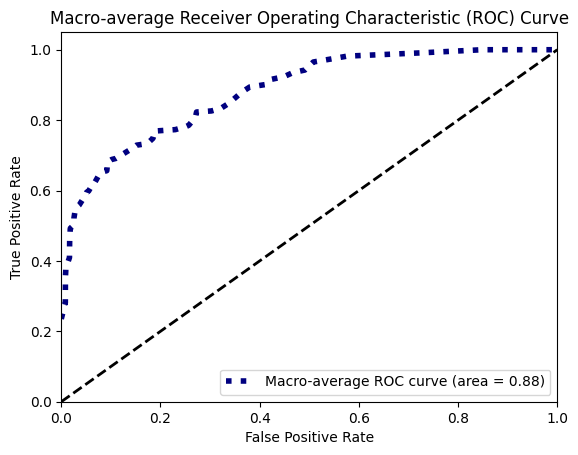

In [ ]:
# 각 클래스에 대한 ROC 곡선을 계산합니다.
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 평균 FPR 및 TPR을 계산합니다.
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(model.classes_))]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(model.classes_)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(model.classes_)

# Macro-average ROC 곡선을 계산합니다.
fpr_macro = all_fpr
tpr_macro = mean_tpr
roc_auc_macro = auc(fpr_macro, tpr_macro)

# Macro-average ROC 곡선을 그립니다.
plt.figure()
plt.plot(fpr_macro, tpr_macro,
         label='Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_macro),
         color='navy', linestyle=':', linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Macro-average Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# from sklearn.datasets import make_multilabel_classification
# from sklearn.multioutput import MultiOutputClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # 다중 출력 분류용 가상 데이터 생성
# # X, y = make_multilabel_classification(n_samples=100, n_features=20, n_classes=3, n_labels=2, random_state=42)

# # 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Random Forest Classifier 모델 생성
# model = RandomForestClassifier(random_state=42)

# # 다중 출력 분류 모델 생성
# multi_output_model = MultiOutputClassifier(model)

# # 모델 훈련
# multi_output_model.fit(X_train, y_train)

# y_pred = multi_output_model.predict(X_test)

# acc = accuracy_score(y_test, y_pred)
# mae = mean_absolute_error(y_test,y_pred)
# print("Accuracy:", acc)
# print('MAE:', mae)

ValueError: y must have at least two dimensions for multi-output regression but has only one.

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X = df.drop(['Arsenal_Points', 'Chelsea_Points', 'Liverpool_Points', 'Man City_Points', 'Man United_Points','Tottenham_Points'], axis=1)

targets = ['Arsenal_Points', 'Chelsea_Points', 'Liverpool_Points', 'Man City_Points', 'Man United_Points','Tottenham_Points']

mae_list = []

for target in targets:
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    gbm = lgb.LGBMRegressor(num_leaves=31, learning_rate=0.05, n_estimators=100)
    gbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='l1')

    y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)

    mae = mean_absolute_error(y_test, y_pred)
    mae_list.append(mae)
    print(f'MAE for {target}: {mae}')

average_mae = sum(mae_list) / len(mae_list)
print(f'Average MAE: {average_mae}')


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 629
[LightGBM] [Info] Number of data points in the train set: 492, number of used features: 31
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.721545
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [ ]:
X = df.drop(['Arsenal_Points', 'Chelsea_Points', 'Liverpool_Points', 'Man City_Points', 'Man United_Points','Tottenham_Points'], axis=1)

targets = ['Arsenal_Points', 'Chelsea_Points', 'Liverpool_Points', 'Man City_Points', 'Man United_Points','Tottenham_Points']

mae_list = []
mse_list = []
r_squared_list = []

for target in targets:
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    gbm = lgb.LGBMRegressor(num_leaves=31, learning_rate=0.05, n_estimators=100)
    gbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric=['l1', 'l2', 'r2'])

    y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)

    mae = mean_absolute_error(y_test, y_pred)
    mae_list.append(mae)

    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

    r_squared = r2_score(y_test, y_pred)
    r_squared_list.append(r_squared)

    print(f'Metrics for {target}:')
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'R-squared: {r_squared}')
    print('')

average_mae = sum(mae_list) / len(mae_list)
average_mse = sum(mse_list) / len(mse_list)
average_r_squared = sum(r_squared_list) / len(r_squared_list)

print('Overall Metrics:')
print(f'Average MAE: {average_mae}')
print(f'Average MSE: {average_mse}')
print(f'Average R-squared: {average_r_squared}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 629
[LightGBM] [Info] Number of data points in the train set: 492, number of used features: 31
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.721545
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes